In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
import glob
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={"figure.dpi":1200})
sns.set_context('notebook')
sns.set_style("ticks")
mpl.style.use('default')
mpl.rcParams['axes.linewidth'] = 7 #set the value globally
mpl.rcParams['xtick.major.size'] = 20
mpl.rcParams['xtick.major.width'] = 7
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 7
mpl.rcParams['ytick.major.size'] = 20
mpl.rcParams['ytick.major.width'] = 7
mpl.rcParams['ytick.labelsize'] = 50
mpl.rcParams['xtick.labelsize'] = 50
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['ytick.minor.width'] = 7
mpl.rcParams['font.size'] = 55
mpl.rcParams['font.sans-serif']='Arial'


In [75]:
###IMPORT DATAFRAMES AND FILTER MAIN LIVE-CELL DATAFRAME
df = pd.read_csv('STALLER_MANUSCRIPT_HIF1A_CITED2_MASTER.csv',index_col=0)
df = df[(df['D std']<4000)]
df = df[(df['A std']<4000)]
df = df[(df['area']<10000)]
df = df[(df['log directA']>3.1)]
sim=pd.read_csv('sim.csv',index_col=0)
#select for HIF and CITED2
HIF = df[df['protein'] != 'CITED2']
CITED2 = df[df['protein'] != 'HIF1A']
sim_HIF = sim[sim['protein'] != 'CITED2']
sim_CITED2 = sim[sim['protein'] != 'HIF1a']

In [76]:
# Step 1: Group by 'well' and 'mut name', then calculate the median for each group
medians_by_well = HIF.groupby(['well', 'mut name'])['Ef'].median().reset_index(name='median_Ef')

# Step 2: Calculate the average and standard deviation of these medians for each 'mut name'
HIF_stats = medians_by_well.groupby('mut name')['median_Ef'].agg(
    avg_median='mean',
    std_dev_median='std'
).reset_index()

print(HIF_stats)

# Step 1: Group by 'well' and 'mut name', then calculate the median for each group
medians_by_well = CITED2.groupby(['well', 'mut name'])['Ef'].median().reset_index(name='median_Ef')

# Step 2: Calculate the average and standard deviation of these medians for each 'mut name'
CITED2_stats = medians_by_well.groupby('mut name')['median_Ef'].agg(
    avg_median='mean',
    std_dev_median='std'
).reset_index()

print(CITED2_stats)


  mut name  avg_median  std_dev_median
0     MA>W    0.550599        0.008102
1     NQ>W    0.534472        0.011276
2     RK>D    0.402201        0.009229
3     RK>E    0.423864        0.005103
4       WT    0.450021        0.005151
        mut name  avg_median  std_dev_median
0      ED>A0to20    0.322848        0.059180
1          FML>A    0.481063        0.008786
2            L>F    0.570753        0.006982
3            L>W    0.610975        0.016607
4  RK>Amut20to39    0.582256        0.014517
5           RK>E    0.571767        0.007862
6             WT    0.592293        0.014540


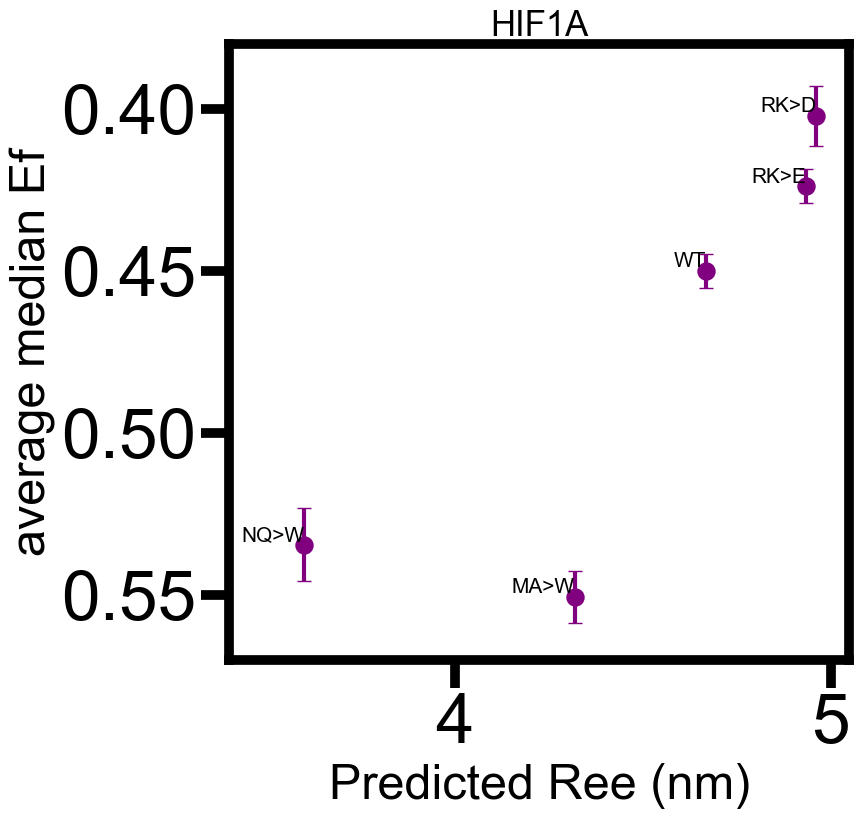

In [123]:
# Merge dataframes on 'mut name'
merged_df = pd.merge(sim_HIF, HIF_stats, on='mut name')

# Plotting
plt.figure(figsize=(8,8))
plt.scatter(merged_df['Ree'], merged_df['avg_median'], s=150, color='purple', alpha=1)

for index, row in merged_df.iterrows():
    plt.errorbar(row['Ree'], row['avg_median'], 
                 yerr=row['std_dev_median'],  # Add vertical error bars
                 fmt='o',  # Use circle markers
                 markersize=10,  # Size of the marker
                 color='purple', 
                 ecolor='purple',  # Color of the error bars
                 elinewidth=3,  # Width of the error bars
                 capsize=5,  # Length of the caps on the error bars
                 alpha=1)

for index, row in merged_df.iterrows():
    plt.text(row['Ree'] ,  # Add a small offset to x position
             row['avg_median'] ,  # Add a small offset to y position
             row['mut name'],
             color='Black',
             fontsize=15,
             ha='right',  # Horizontal alignment (try 'left', 'right', 'center')
             va='bottom')  # Vertical alignment (try 'top', 'bottom', 'center')

plt.title('HIF1A',fontsize=25)
plt.xlabel('Predicted Ree (nm)',fontsize=35)
plt.ylabel('average median Ef',fontsize=35)
plt.ylim([0.57, 0.38])  # Adjust these limits based on your data
plt.xlim([3.4, 5.05])  # Adjust these limits based on your data

plt.show()

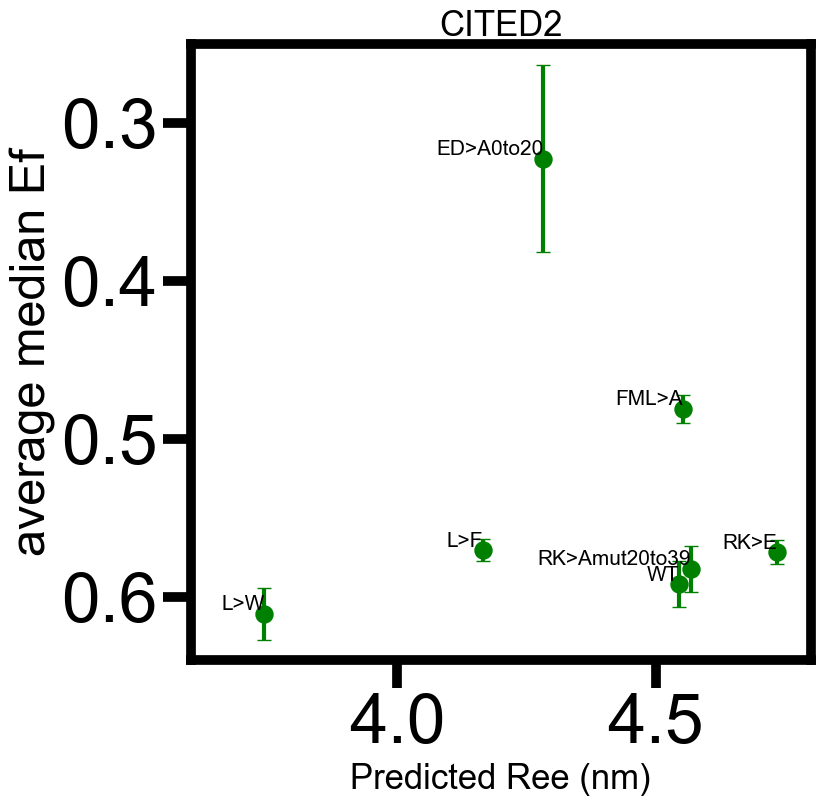

In [124]:
# Merge dataframes on 'mut name'
merged_df = pd.merge(sim_CITED2, CITED2_stats, on='mut name')

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(merged_df['Ree'], merged_df['avg_median'], s=150, color='green', alpha=1)

for index, row in merged_df.iterrows():
    plt.errorbar(row['Ree'], row['avg_median'], 
                 yerr=row['std_dev_median'],  # Add vertical error bars
                 fmt='o',  # Use circle markers
                 markersize=10,  # Size of the marker
                 color='green', 
                 ecolor='green',  # Color of the error bars
                 elinewidth=3,  # Width of the error bars
                 capsize=5,  # Length of the caps on the error bars
                 alpha=1)

for index, row in merged_df.iterrows():
    plt.text(row['Ree'],  # Add a small offset to x position
             row['avg_median'],  # Add a small offset to y position
             row['mut name'],
             color='Black',
             fontsize=15,
             ha='right',  # Horizontal alignment (try 'left', 'right', 'center')
             va='bottom')  # Vertical alignment (try 'top', 'bottom', 'center')

plt.title('CITED2',fontsize=25)
plt.xlabel('Predicted Ree (nm)',fontsize=25)
plt.ylabel('average median Ef',fontsize=35)

plt.ylim([0.64, 0.25])  # Adjust these limits based on your data
plt.xlim([3.6, 4.8])  # Adjust these limits based on your data

plt.show()

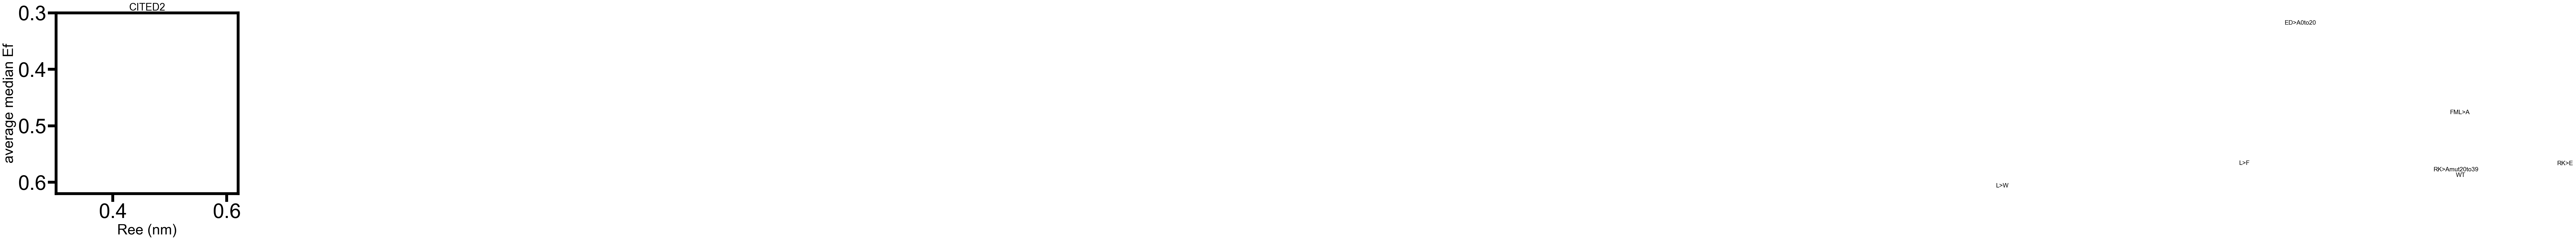

In [97]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your merged_df is already defined

# Plotting with adjusted xlim
plt.figure(figsize=(8, 8))
plt.scatter(merged_df['Ree'], merged_df['avg_median'], s=150, color='green', alpha=1)

# Define xlim explicitly for consistency and control
xlims = [0.3, 0.62]
plt.xlim(xlims)

for index, row in merged_df.iterrows():
    # Check if the Ree value is close to the xlim boundaries
    offset = 0.01  # Adjust offset for label positioning as needed
    x_position = row['Ree']
    ha = 'center'  # Default horizontal alignment
    
    # Adjust label position and alignment if too close to the plot edges
    if x_position - offset < xlims[0]:
        x_position += offset
        ha = 'left'
    elif x_position + offset > xlims[1]:
        x_position -= offset
        ha = 'right'
    
    plt.text(x_position, row['avg_median'], row['mut name'],
             color='Black', fontsize=15, ha=ha, va='bottom')

plt.title('CITED2', fontsize=25)
plt.xlabel('Ree (nm)', fontsize=35)
plt.ylabel('average median Ef', fontsize=35)
plt.ylim([0.62, 0.3])  # Ensure ylim is correctly set to include all data points and labels

plt.show()
